In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
import tensorflow as tf

In [2]:
df = pd.read_csv("data.csv")
df = df.rename(columns={"tension_strenght": "tensile_strength"})
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tensile_strength    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [4]:
for column in df.columns:
    print(str(column)+": "+str(df[column].unique()))
    print()

layer_height: [0.02 0.06 0.1  0.15 0.2 ]

wall_thickness: [ 8  7  1  4  6 10  5  9  2  3]

infill_density: [90 80 70 40 10 20 50 30 60]

infill_pattern: ['grid' 'honeycomb']

nozzle_temperature: [220 225 230 240 250 200 205 210 215]

bed_temperature: [60 65 70 75 80]

print_speed: [ 40  60 120]

material: ['abs' 'pla']

fan_speed: [  0  25  50  75 100]

roughness: [ 25  32  40  68  92  60  55  21  24  30  75 118 200 220 126 145  88  74
 120 144 265 312 368 180 176 128 138 121 168 154 225 289 326 192 212 172
 163 276 298 360 357 321 278 244]

tensile_strength: [18 16  8 10  5 24 12 14 27 25 37  9 23 26 33 29 19 11 34 13 22  4 35 28
 21 30]

elongation: [1.2 1.4 0.8 0.5 0.7 1.1 1.3 1.5 1.7 2.4 1.  2.2 1.9 1.6 2.1 2.  0.9 0.4
 1.8 2.9 0.6 2.8 2.3 3.3 3.1 2.7 3.2]



In [5]:
#In this data set, ABS and PLA assigned 0 and 1 values for materials (abs = 0, pla = 1)
df.material = [0 if each=='abs' else 1 for each in df.material]

#In this data set, grid and honeycomb assigned 0 and 1 values for infill_pattern (grid = 0, honeycomb = 1)
df.infill_pattern = [0 if each=='grid' else 1 for each in df.infill_pattern]

df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


In [6]:
df.layer_height = df.layer_height*100
df.elongation = df.elongation*100

In [7]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


In [8]:
output_drops = ['tensile_strength', 'roughness']
df = df.drop(output_drops, axis=1)

In [9]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,elongation
0,2.0,8,90,0,220,60,40,0,0,120.0
1,2.0,7,90,1,225,65,40,0,25,140.0
2,2.0,1,80,0,230,70,40,0,50,80.0
3,2.0,4,70,1,240,75,40,0,75,50.0
4,2.0,6,90,0,250,80,40,0,100,70.0


In [10]:
target_cols = ['elongation']
y = df[target_cols]
X = df.drop(target_cols,axis=1)

In [11]:
import statsmodels.api as sm 


X_1 = sm.add_constant(X) #Adding constant column of ones, mandatory for sm.OLS model

model = sm.OLS(y,X_1).fit()
model.pvalues

C:\Users\Amir\.conda\envs\DSMM\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                 6.331810e-04
layer_height          3.580806e-07
wall_thickness        2.481944e-01
infill_density        1.086024e-03
infill_pattern        6.484224e-01
nozzle_temperature    8.341976e-04
bed_temperature       6.564575e-04
print_speed           1.804048e-01
material              1.487581e-02
fan_speed             1.752670e-04
dtype: float64

In [12]:
# Backward Elimination: if p-value > 0.05, then remove it
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    print(pmax, feature_with_p_max)
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
        print("Removed!")
        print("--------")
    else:
        break

print("Screening ended")
selected_features_BE = cols
#print(selected_features_BE)      # Print the names of the selected columns
#print(X[selected_features_BE])
X_selected = X[selected_features_BE]
print(X_selected.shape)
X_selected.head()

0.6484224288853967 infill_pattern
Removed!
--------
0.26698358924688625 wall_thickness
Removed!
--------
0.04190931322238077 print_speed
Screening ended
(50, 7)


C:\Users\Amir\.conda\envs\DSMM\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Amir\.conda\envs\DSMM\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Amir\.conda\envs\DSMM\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,layer_height,infill_density,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,2.0,90,220,60,40,0,0
1,2.0,90,225,65,40,0,25
2,2.0,80,230,70,40,0,50
3,2.0,70,240,75,40,0,75
4,2.0,90,250,80,40,0,100


In [14]:
dropnew = ['wall_thickness', 'infill_pattern']
dfnew = df.drop(dropnew, axis=1)
dfnew.head()

,layer_height,infill_density,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,elongation
0,2.0,90,220,60,40,0,0,120.0
1,2.0,90,225,65,40,0,25,140.0
2,2.0,80,230,70,40,0,50,80.0
3,2.0,70,240,75,40,0,75,50.0
4,2.0,90,250,80,40,0,100,70.0


In [15]:
X = X_selected.values
Y = y.values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.09)
print(X_train.shape)
print(Y_test.shape)

(45, 7)
(5, 1)


In [17]:
# Construct a NN model using functional API
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Activation, Flatten

inputvec = Input( shape=(7,) )
x = Dense( 16, activation='relu' )(inputvec)
x = Dense( 32, activation='relu' )(x)
x = Dense( 64, activation='relu' )(x)
#x = Dropout(0.5)(x)
x = Dense( 32, activation='relu' )(x)
x = Dense( 16, activation='relu' )(x)
x = Dense( 8, activation='relu' )(x)
#x = Dropout(0.25)(x)
preds = Dense(1, activation='linear' )(x)

model = Model(name= 'NN_model_2_2', inputs = inputvec,outputs=preds)
model.summary()

Model: "NN_model_2_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                

In [18]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Epoch 1/1000
9/9 [==============================] - 0s 1ms/step - loss: 31268.4492 - accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 2ms/step - loss: 22943.1758 - accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 1ms/step - loss: 14997.0830 - accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 2ms/step - loss: 9623.0537 - accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 1ms/step - loss: 8031.5195 - accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 1ms/step - loss: 8018.8154 - accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 2ms/step - loss: 7753.3516 - accuracy: 0.0000e+00
Epoch 8/1000
9/9 [==============================] - 0s 1ms/step - loss: 7865.7319 - accuracy: 0.0000e+00
Epoch 9/1000
9/9 [==============================] - 0s 1ms/step - loss: 7699.3491 - accuracy: 0.0000e+00
Epoch 10/1000
9/9 [==============================] -

9/9 [==============================] - 0s 1ms/step - loss: 4922.3374 - accuracy: 0.0000e+00
Epoch 78/1000
9/9 [==============================] - 0s 1ms/step - loss: 4959.5356 - accuracy: 0.0000e+00
Epoch 79/1000
9/9 [==============================] - 0s 1ms/step - loss: 4814.9478 - accuracy: 0.0000e+00
Epoch 80/1000
9/9 [==============================] - 0s 1ms/step - loss: 4592.0181 - accuracy: 0.0000e+00
Epoch 81/1000
9/9 [==============================] - 0s 1ms/step - loss: 4701.2158 - accuracy: 0.0000e+00
Epoch 82/1000
9/9 [==============================] - 0s 997us/step - loss: 4834.7959 - accuracy: 0.0000e+00
Epoch 83/1000
9/9 [==============================] - 0s 1ms/step - loss: 5163.6587 - accuracy: 0.0000e+00
Epoch 84/1000
9/9 [==============================] - 0s 1ms/step - loss: 4513.4419 - accuracy: 0.0000e+00
Epoch 85/1000
9/9 [==============================] - 0s 2ms/step - loss: 4464.3398 - accuracy: 0.0000e+00
Epoch 86/1000
9/9 [==============================] - 0s 1m

9/9 [==============================] - 0s 2ms/step - loss: 3346.8999 - accuracy: 0.0000e+00
Epoch 154/1000
9/9 [==============================] - 0s 1ms/step - loss: 3340.9426 - accuracy: 0.0000e+00
Epoch 155/1000
9/9 [==============================] - 0s 1ms/step - loss: 3420.0698 - accuracy: 0.0000e+00
Epoch 156/1000
9/9 [==============================] - 0s 1ms/step - loss: 3618.6987 - accuracy: 0.0000e+00
Epoch 157/1000
9/9 [==============================] - 0s 1ms/step - loss: 3156.5562 - accuracy: 0.0000e+00
Epoch 158/1000
9/9 [==============================] - 0s 1ms/step - loss: 3182.0896 - accuracy: 0.0000e+00
Epoch 159/1000
9/9 [==============================] - 0s 1ms/step - loss: 3063.0479 - accuracy: 0.0000e+00
Epoch 160/1000
9/9 [==============================] - 0s 1ms/step - loss: 3362.9131 - accuracy: 0.0000e+00
Epoch 161/1000
9/9 [==============================] - 0s 1ms/step - loss: 3423.8782 - accuracy: 0.0000e+00
Epoch 162/1000
9/9 [==============================] 

9/9 [==============================] - 0s 1ms/step - loss: 2210.8301 - accuracy: 0.0000e+00
Epoch 230/1000
9/9 [==============================] - 0s 1ms/step - loss: 2201.1938 - accuracy: 0.0000e+00
Epoch 231/1000
9/9 [==============================] - 0s 1ms/step - loss: 2391.4973 - accuracy: 0.0000e+00
Epoch 232/1000
9/9 [==============================] - 0s 1ms/step - loss: 2348.3308 - accuracy: 0.0000e+00
Epoch 233/1000
9/9 [==============================] - 0s 1ms/step - loss: 2569.4666 - accuracy: 0.0000e+00
Epoch 234/1000
9/9 [==============================] - 0s 1ms/step - loss: 2247.5569 - accuracy: 0.0000e+00
Epoch 235/1000
9/9 [==============================] - 0s 1ms/step - loss: 2115.9705 - accuracy: 0.0000e+00
Epoch 236/1000
9/9 [==============================] - 0s 1ms/step - loss: 2003.7466 - accuracy: 0.0000e+00
Epoch 237/1000
9/9 [==============================] - 0s 1ms/step - loss: 2161.4045 - accuracy: 0.0000e+00
Epoch 238/1000
9/9 [==============================] 

9/9 [==============================] - 0s 1ms/step - loss: 1170.5083 - accuracy: 0.0000e+00
Epoch 306/1000
9/9 [==============================] - 0s 1ms/step - loss: 1197.7910 - accuracy: 0.0000e+00
Epoch 307/1000
9/9 [==============================] - 0s 1ms/step - loss: 1531.2087 - accuracy: 0.0000e+00
Epoch 308/1000
9/9 [==============================] - 0s 1ms/step - loss: 2130.8103 - accuracy: 0.0000e+00
Epoch 309/1000
9/9 [==============================] - 0s 1ms/step - loss: 1613.7832 - accuracy: 0.0000e+00
Epoch 310/1000
9/9 [==============================] - 0s 2ms/step - loss: 1521.1567 - accuracy: 0.0000e+00
Epoch 311/1000
9/9 [==============================] - 0s 1ms/step - loss: 1209.6604 - accuracy: 0.0000e+00
Epoch 312/1000
9/9 [==============================] - 0s 1ms/step - loss: 1157.9023 - accuracy: 0.0000e+00
Epoch 313/1000
9/9 [==============================] - 0s 1ms/step - loss: 1168.9590 - accuracy: 0.0000e+00
Epoch 314/1000
9/9 [==============================] 

9/9 [==============================] - 0s 1ms/step - loss: 510.0115 - accuracy: 0.0000e+00
Epoch 383/1000
9/9 [==============================] - 0s 1ms/step - loss: 537.7709 - accuracy: 0.0000e+00
Epoch 384/1000
9/9 [==============================] - 0s 1ms/step - loss: 495.3745 - accuracy: 0.0000e+00
Epoch 385/1000
9/9 [==============================] - 0s 1ms/step - loss: 534.2667 - accuracy: 0.0000e+00
Epoch 386/1000
9/9 [==============================] - 0s 1ms/step - loss: 501.9223 - accuracy: 0.0000e+00
Epoch 387/1000
9/9 [==============================] - 0s 1ms/step - loss: 505.9199 - accuracy: 0.0000e+00
Epoch 388/1000
9/9 [==============================] - 0s 1ms/step - loss: 611.5035 - accuracy: 0.0000e+00
Epoch 389/1000
9/9 [==============================] - 0s 1ms/step - loss: 533.1868 - accuracy: 0.0000e+00
Epoch 390/1000
9/9 [==============================] - 0s 1ms/step - loss: 754.1779 - accuracy: 0.0000e+00
Epoch 391/1000
9/9 [==============================] - 0s 1ms/

9/9 [==============================] - 0s 1ms/step - loss: 405.4717 - accuracy: 0.0000e+00
Epoch 460/1000
9/9 [==============================] - 0s 1ms/step - loss: 379.4984 - accuracy: 0.0000e+00
Epoch 461/1000
9/9 [==============================] - 0s 1ms/step - loss: 333.4155 - accuracy: 0.0000e+00
Epoch 462/1000
9/9 [==============================] - 0s 1ms/step - loss: 322.5026 - accuracy: 0.0000e+00
Epoch 463/1000
9/9 [==============================] - 0s 1ms/step - loss: 381.5324 - accuracy: 0.0000e+00
Epoch 464/1000
9/9 [==============================] - 0s 1ms/step - loss: 477.6474 - accuracy: 0.0000e+00
Epoch 465/1000
9/9 [==============================] - 0s 1ms/step - loss: 308.5030 - accuracy: 0.0000e+00
Epoch 466/1000
9/9 [==============================] - 0s 1ms/step - loss: 366.0170 - accuracy: 0.0000e+00
Epoch 467/1000
9/9 [==============================] - 0s 1ms/step - loss: 275.1525 - accuracy: 0.0000e+00
Epoch 468/1000
9/9 [==============================] - 0s 1ms/

9/9 [==============================] - 0s 1ms/step - loss: 213.8471 - accuracy: 0.0000e+00
Epoch 537/1000
9/9 [==============================] - 0s 1ms/step - loss: 225.9326 - accuracy: 0.0000e+00
Epoch 538/1000
9/9 [==============================] - 0s 1ms/step - loss: 223.5163 - accuracy: 0.0000e+00
Epoch 539/1000
9/9 [==============================] - 0s 1ms/step - loss: 230.5312 - accuracy: 0.0000e+00
Epoch 540/1000
9/9 [==============================] - 0s 1ms/step - loss: 200.4330 - accuracy: 0.0000e+00
Epoch 541/1000
9/9 [==============================] - 0s 2ms/step - loss: 252.9157 - accuracy: 0.0000e+00
Epoch 542/1000
9/9 [==============================] - 0s 1ms/step - loss: 176.2880 - accuracy: 0.0000e+00
Epoch 543/1000
9/9 [==============================] - 0s 2ms/step - loss: 201.8658 - accuracy: 0.0000e+00
Epoch 544/1000
9/9 [==============================] - 0s 1ms/step - loss: 216.8678 - accuracy: 0.0000e+00
Epoch 545/1000
9/9 [==============================] - 0s 1ms/

9/9 [==============================] - 0s 1ms/step - loss: 134.6075 - accuracy: 0.0000e+00
Epoch 614/1000
9/9 [==============================] - 0s 1ms/step - loss: 110.1381 - accuracy: 0.0000e+00
Epoch 615/1000
9/9 [==============================] - 0s 1ms/step - loss: 128.1325 - accuracy: 0.0000e+00
Epoch 616/1000
9/9 [==============================] - 0s 1ms/step - loss: 139.0118 - accuracy: 0.0000e+00
Epoch 617/1000
9/9 [==============================] - 0s 1ms/step - loss: 178.0660 - accuracy: 0.0000e+00
Epoch 618/1000
9/9 [==============================] - 0s 1ms/step - loss: 131.4394 - accuracy: 0.0000e+00
Epoch 619/1000
9/9 [==============================] - 0s 1ms/step - loss: 124.4424 - accuracy: 0.0000e+00
Epoch 620/1000
9/9 [==============================] - 0s 1ms/step - loss: 103.1988 - accuracy: 0.0000e+00
Epoch 621/1000
9/9 [==============================] - 0s 1ms/step - loss: 111.3622 - accuracy: 0.0000e+00
Epoch 622/1000
9/9 [==============================] - 0s 1ms/

9/9 [==============================] - 0s 1ms/step - loss: 332.8134 - accuracy: 0.0000e+00
Epoch 691/1000
9/9 [==============================] - 0s 1ms/step - loss: 191.9848 - accuracy: 0.0000e+00
Epoch 692/1000
9/9 [==============================] - 0s 1ms/step - loss: 148.0514 - accuracy: 0.0000e+00
Epoch 693/1000
9/9 [==============================] - 0s 1ms/step - loss: 108.1753 - accuracy: 0.0000e+00
Epoch 694/1000
9/9 [==============================] - 0s 1ms/step - loss: 171.2032 - accuracy: 0.0000e+00
Epoch 695/1000
9/9 [==============================] - 0s 1ms/step - loss: 241.0788 - accuracy: 0.0000e+00
Epoch 696/1000
9/9 [==============================] - 0s 1ms/step - loss: 329.8622 - accuracy: 0.0000e+00
Epoch 697/1000
9/9 [==============================] - 0s 2ms/step - loss: 156.2672 - accuracy: 0.0000e+00
Epoch 698/1000
9/9 [==============================] - 0s 1ms/step - loss: 235.2333 - accuracy: 0.0000e+00
Epoch 699/1000
9/9 [==============================] - 0s 1ms/

9/9 [==============================] - 0s 1ms/step - loss: 177.4652 - accuracy: 0.0000e+00
Epoch 768/1000
9/9 [==============================] - 0s 1ms/step - loss: 122.7084 - accuracy: 0.0000e+00
Epoch 769/1000
9/9 [==============================] - 0s 1ms/step - loss: 190.5021 - accuracy: 0.0000e+00
Epoch 770/1000
9/9 [==============================] - 0s 2ms/step - loss: 133.6646 - accuracy: 0.0000e+00
Epoch 771/1000
9/9 [==============================] - 0s 1ms/step - loss: 192.3269 - accuracy: 0.0000e+00
Epoch 772/1000
9/9 [==============================] - 0s 1ms/step - loss: 211.3379 - accuracy: 0.0000e+00
Epoch 773/1000
9/9 [==============================] - 0s 1ms/step - loss: 256.9639 - accuracy: 0.0000e+00
Epoch 774/1000
9/9 [==============================] - 0s 1ms/step - loss: 570.0222 - accuracy: 0.0000e+00
Epoch 775/1000
9/9 [==============================] - 0s 1ms/step - loss: 523.8142 - accuracy: 0.0000e+00
Epoch 776/1000
9/9 [==============================] - 0s 2ms/

9/9 [==============================] - 0s 1ms/step - loss: 48.1433 - accuracy: 0.0000e+00
Epoch 845/1000
9/9 [==============================] - 0s 1ms/step - loss: 36.1056 - accuracy: 0.0000e+00
Epoch 846/1000
9/9 [==============================] - 0s 1ms/step - loss: 28.5813 - accuracy: 0.0000e+00
Epoch 847/1000
9/9 [==============================] - 0s 1ms/step - loss: 40.1457 - accuracy: 0.0000e+00
Epoch 848/1000
9/9 [==============================] - 0s 1ms/step - loss: 30.2270 - accuracy: 0.0000e+00
Epoch 849/1000
9/9 [==============================] - 0s 2ms/step - loss: 37.6645 - accuracy: 0.0000e+00
Epoch 850/1000
9/9 [==============================] - 0s 1ms/step - loss: 24.6188 - accuracy: 0.0000e+00
Epoch 851/1000
9/9 [==============================] - 0s 2ms/step - loss: 32.9577 - accuracy: 0.0000e+00
Epoch 852/1000
9/9 [==============================] - 0s 1ms/step - loss: 36.9206 - accuracy: 0.0000e+00
Epoch 853/1000
9/9 [==============================] - 0s 1ms/step - lo

9/9 [==============================] - 0s 1ms/step - loss: 23.3921 - accuracy: 0.0000e+00
Epoch 923/1000
9/9 [==============================] - 0s 1ms/step - loss: 38.1651 - accuracy: 0.0000e+00
Epoch 924/1000
9/9 [==============================] - 0s 2ms/step - loss: 54.1916 - accuracy: 0.0000e+00
Epoch 925/1000
9/9 [==============================] - 0s 2ms/step - loss: 59.8651 - accuracy: 0.0000e+00
Epoch 926/1000
9/9 [==============================] - 0s 1ms/step - loss: 81.9279 - accuracy: 0.0000e+00
Epoch 927/1000
9/9 [==============================] - 0s 1ms/step - loss: 51.4290 - accuracy: 0.0000e+00
Epoch 928/1000
9/9 [==============================] - 0s 1ms/step - loss: 60.1847 - accuracy: 0.0000e+00
Epoch 929/1000
9/9 [==============================] - 0s 1ms/step - loss: 85.4119 - accuracy: 0.0000e+00
Epoch 930/1000
9/9 [==============================] - 0s 1ms/step - loss: 107.2872 - accuracy: 0.0000e+00
Epoch 931/1000
9/9 [==============================] - 0s 1ms/step - l

9/9 [==============================] - 0s 1ms/step - loss: 162.9549 - accuracy: 0.0000e+00
Epoch 1000/1000
9/9 [==============================] - 0s 1ms/step - loss: 108.8434 - accuracy: 0.0000e+00
Done!


Text(0, 0.5, 'mean squared error')

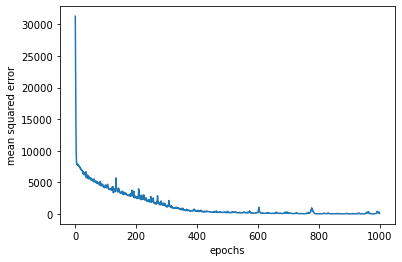

In [19]:
# Fit model to the data (train the model)
from keras.callbacks import History
history = History()

model.fit(X_train, Y_train, batch_size=5, epochs=1000, verbose=1, callbacks=[history])
# Batch size = 50 (all samples), epoch number = 10000 (the learning algorithm works through the entire dataset for 10000 times)
print('Done!')

# Plot the loss history
plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("mean squared error")

Text(0, 0.5, 'mean squared error')

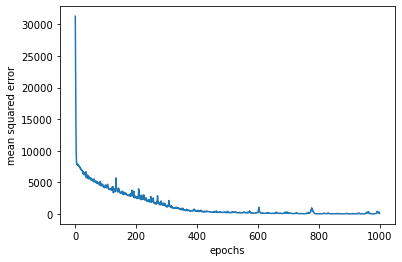

In [20]:
plt.plot(history.history['loss'],)
plt.xlabel("epochs")
plt.ylabel("mean squared error")

1/1 [==============================] - 0s 117ms/step - loss: 3470.2903 - accuracy: 0.0000e+00
[3470.290283203125, 0.0]


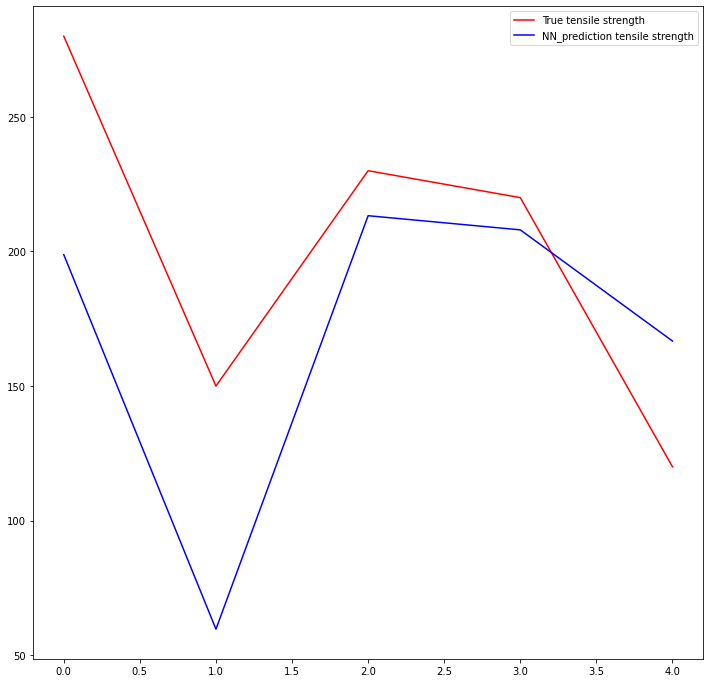

In [21]:
# Evaluate the accuracy of the model (loss: mean squared error, as defined in the step of compiling)
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

# Batch prediction & plot
Y_pred = model.predict(X_test)


plt.show()
plt.figure(figsize=(12, 12))
line1, = plt.plot(Y_test[:,0],'r-')
line2, = plt.plot(Y_pred[:,0],'b-')
#line3, = plt.plot(Y_test[:,1],'r--')
#line4, = plt.plot(Y_pred[:,1],'b--')
#line5, = plt.plot(Y_test[:,2],'r:')
#line6, = plt.plot(Y_pred[:,2],'b:')
plt.legend([line1, line2], ['True tensile strength', 'NN_prediction tensile strength', 'True roughness', 'NN_prediction roughness', 'True elongation', 'NN_prediction elongation'])